In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Ensure inline plotting
%matplotlib inline

In [5]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
print(df.shape)

(15509, 10)


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [13]:
print(df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [15]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [17]:
# Drop rows with missing values
df.dropna(inplace=True)

# Recheck for missing values
print(df.isna().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [18]:
# Convert 'Votes' to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype('int')

# Extract the year from the 'Year' column
df['Year'] = df['Year'].str.extract('(\d{4})').astype(int)

# Remove the string 'min' from 'Duration' and convert to integer
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

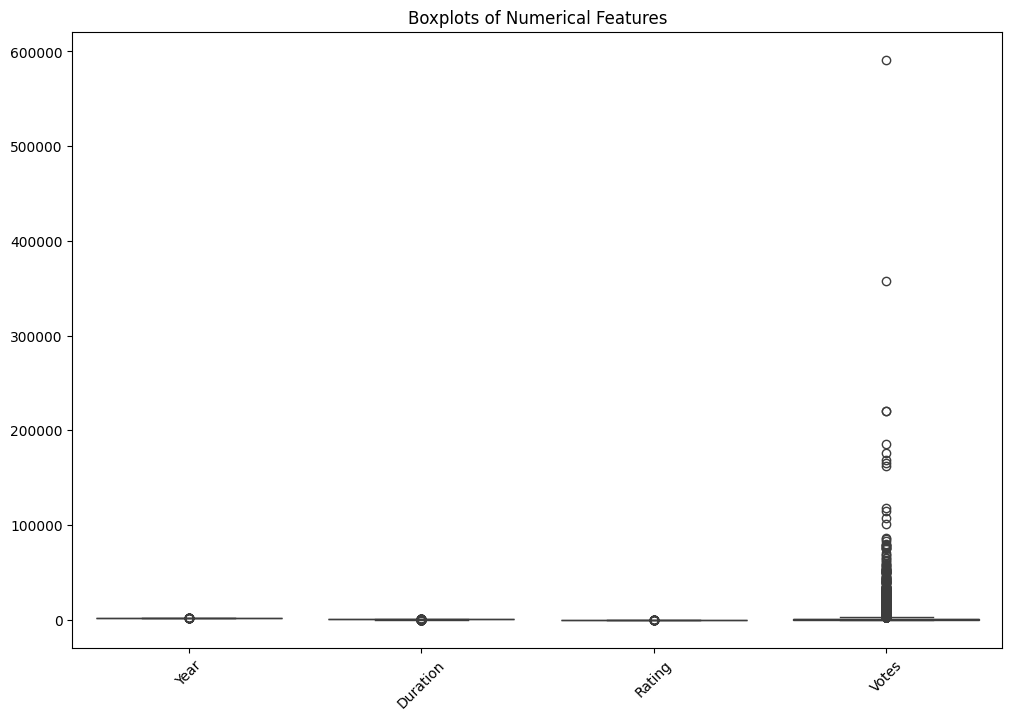

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Handling outliers in 'Duration' using IQR method
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Duration'] < (Q1 - 1.5 * IQR)) | (df['Duration'] > (Q3 + 1.5 * IQR)))]

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5559 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5559 non-null   object 
 1   Year      5559 non-null   int64  
 2   Duration  5559 non-null   int64  
 3   Genre     5559 non-null   object 
 4   Rating    5559 non-null   float64
 5   Votes     5559 non-null   int64  
 6   Director  5559 non-null   object 
 7   Actor 1   5559 non-null   object 
 8   Actor 2   5559 non-null   object 
 9   Actor 3   5559 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 477.7+ KB
None


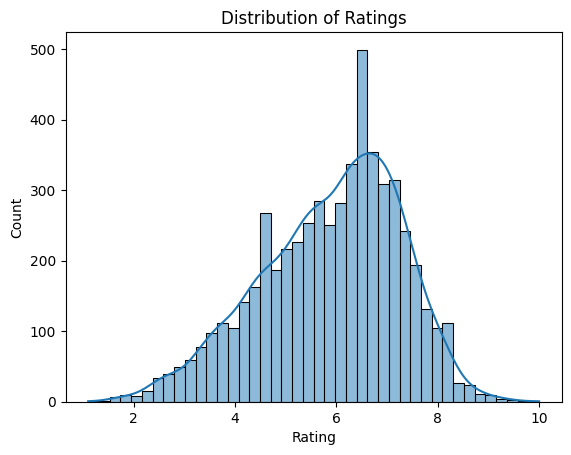

In [22]:
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of Ratings')
plt.show()

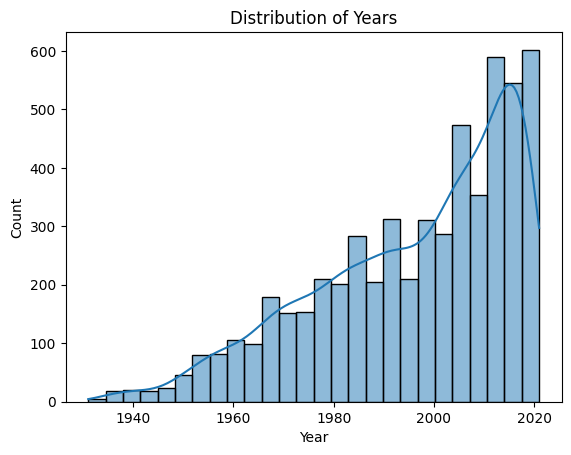

In [23]:
sns.histplot(data=df, x='Year', kde=True)
plt.title('Distribution of Years')
plt.show()

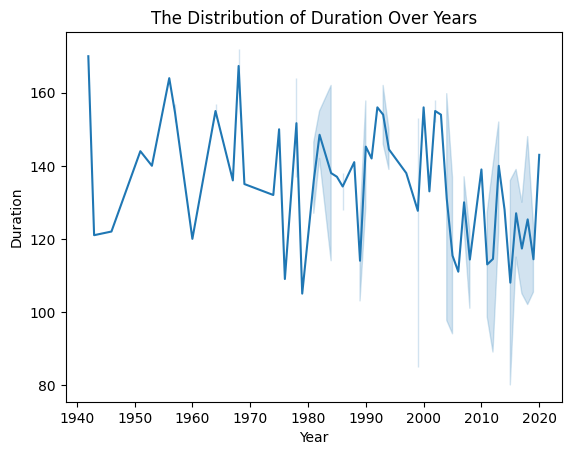

In [24]:
sns.lineplot(data=df.sample(100), x='Year', y='Duration')
plt.title('The Distribution of Duration Over Years')
plt.show()

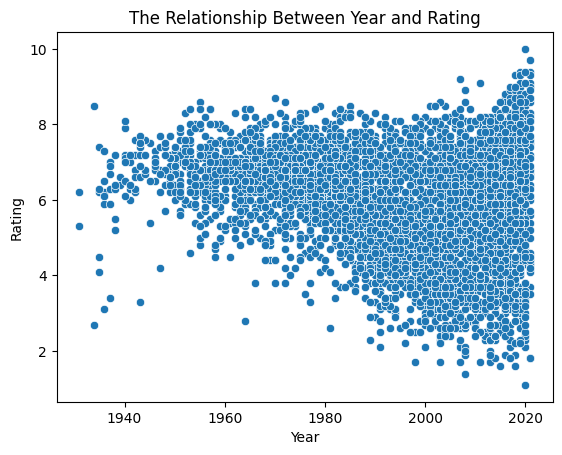

In [25]:
sns.scatterplot(data=df, x='Year', y='Rating')
plt.title('The Relationship Between Year and Rating')
plt.show()

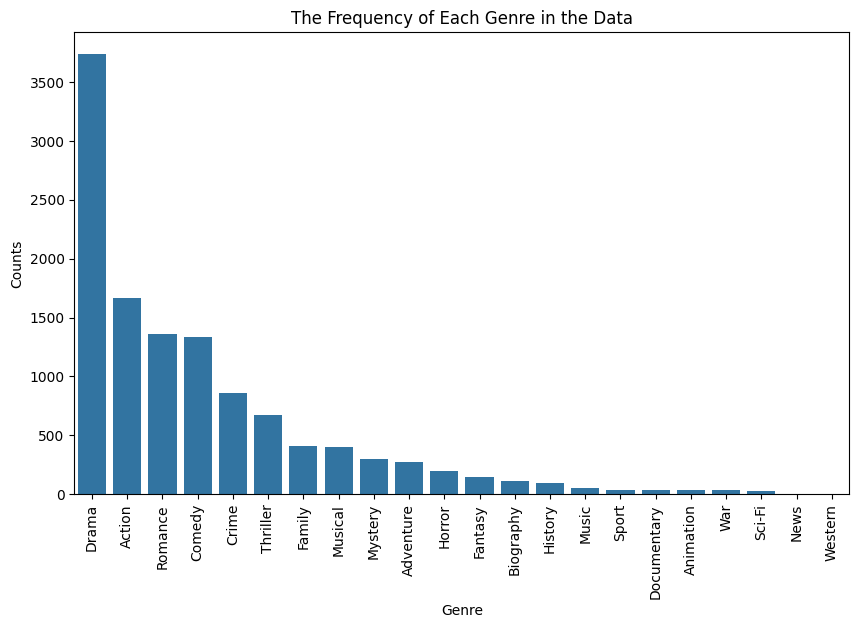

In [26]:
movies_genre = df['Genre'].str.split(', ', expand=True).stack().value_counts()
labels = movies_genre.index
count = movies_genre.values
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=count)
plt.xticks(rotation=90)
plt.title('The Frequency of Each Genre in the Data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [27]:
# Encode categorical columns
encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])

<ipython-input-27-b33d782cdb23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
<ipython-input-27-b33d782cdb23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
<ipython-input-27-b33d782cdb23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [28]:
df2 = df.drop('Name', axis=1)

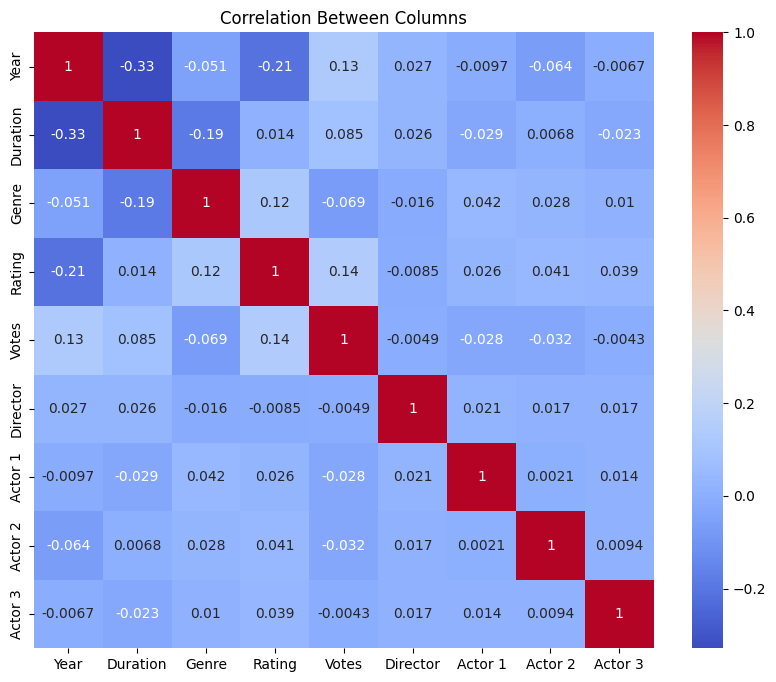

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Columns')
plt.show()

In [30]:
# Split the data into features and target
X = df2.drop('Rating', axis=1)
y = df2['Rating']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Reduce n_iter and add verbose for monitoring
randomized_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid, n_iter=20, cv=5, scoring='r2', n_jobs=-1, verbose=1)
randomized_search.fit(X_train, y_train)

best_rf_model = randomized_search.best_estimator_
print("Best parameters found: ", randomized_search.best_params_)
print("Best R^2 score found: ", randomized_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 15, 'max_depth': 40}
Best R^2 score found:  0.3439434136720491


In [38]:
# Add tuned Random Forest to models
models['Tuned Random Forest'] = best_rf_model

In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R2 Score: {r2}\n")

Model: Linear Regression
  Mean Absolute Error: 0.9968177078082474
  Mean Squared Error: 1.6022031587367718
  R2 Score: 0.10179813371314761

Model: Ridge Regression
  Mean Absolute Error: 0.9968177134161866
  Mean Squared Error: 1.602203157370079
  R2 Score: 0.10179813447932129

Model: Lasso Regression
  Mean Absolute Error: 0.9994783149668474
  Mean Squared Error: 1.6058147408421175
  R2 Score: 0.09977346551200161

Model: Random Forest
  Mean Absolute Error: 0.8051450839328537
  Mean Squared Error: 1.1661718033573143
  R2 Score: 0.3462391554561075

Model: Tuned Random Forest
  Mean Absolute Error: 0.8021368108013576
  Mean Squared Error: 1.1633522055294947
  R2 Score: 0.3478198339220786



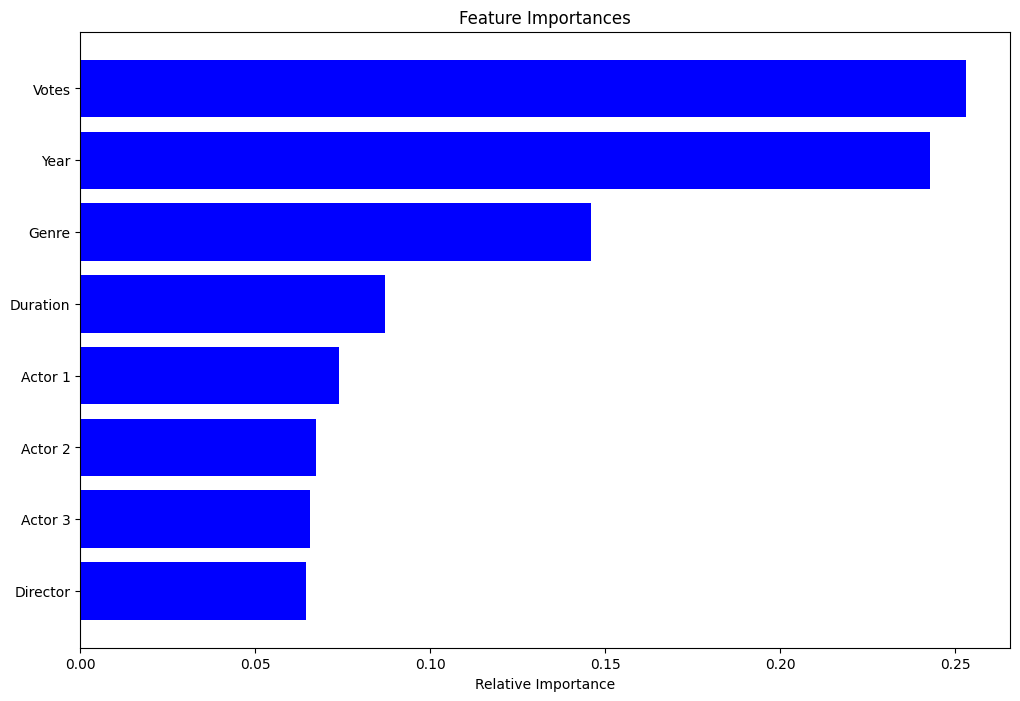

In [41]:
import numpy as np  # Add this line to import NumPy

# Assuming you have already defined best_rf_model, importances, and features

indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()